In [1]:
# 引入函数库
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd
import os
from sklearn.metrics import roc_auc_score

In [2]:
# 获取代码文件的绝对路径
code_file = os.path.abspath('Code')

# 获取Code文件夹的绝对路径
code_dir = os.path.dirname(os.path.abspath('Code')) 

# 获取总文件夹的绝对路径
parent_dir = os.path.dirname(code_dir) 

# 拼接得到Data文件夹的绝对路径
data_dir = os.path.join(parent_dir, 'Data')
results_dir = os.path.join(parent_dir, 'Results') 

In [3]:
# 得到data的绝对路径
# 训练集
train_file = os.path.join(data_dir, 'train.csv')
train = pd.read_csv(train_file)
train

id  age           job   marital            education  default  \
0          1   51        admin.  divorced  professional.course       no   
1          2   50      services   married          high.school  unknown   
2          3   48   blue-collar  divorced             basic.9y       no   
3          4   26  entrepreneur    single          high.school      yes   
4          5   45        admin.    single    university.degree       no   
...      ...  ...           ...       ...                  ...      ...   
22495  22496   33        admin.   married          high.school       no   
22496  22497   34        admin.  divorced          high.school       no   
22497  22498   25        admin.   married  professional.course       no   
22498  22499   57       retired   married          high.school       no   
22499  22500   44   blue-collar   married             basic.9y  unknown   

       housing     loan    contact month  ... campaign  pdays  previous  \
0          yes      yes   cellular   aug  ...        1    112         2   
1          yes       no   cellular   may  ...        1    412         2   
2           no       no   cellular   apr  ...        0   1027         1   
3          yes      yes   cellular   aug  ...       26    998         0   
4           no       no   cellular   nov  ...        1    240         4   
...        ...      ...        ...   ...  ...      ...    ...       ...   
22495       no       no   cellular   aug  ...        3    925         3   
22496  unknown  unknown   cellular   aug  ...       14    533         3   
22497      yes       no   cellular   may  ...        0    792         5   
22498      yes       no  telephone   may  ...        5    989         0   
22499      yes       no   cellular   apr  ...        0   1001         1   

          poutcome  emp_var_rate cons_price_index  cons_conf_index  \
0          failure           1.4            90.81           -35.53   
1      nonexistent          -1.8            96.33           -40.58   
2          failure          -1.8            96.33           -44.74   
3      nonexistent           1.4            97.08           -35.55   
4          success          -3.4            89.82           -33.83   
...            ...           ...              ...              ...   
22495      failure          -2.9            92.47           -43.30   
22496      failure           1.4            93.64           -26.27   
22497      success          -1.8            90.43           -36.75   
22498  nonexistent           1.1            89.38           -37.96   
22499      failure          -1.8            90.18           -46.20   

       lending_rate3m  nr_employed  subscribe  
0                0.69      5219.74         no  
1                4.05      4974.79        yes  
2                1.50      5022.61         no  
3                5.11      5222.87        yes  
4                1.17      4884.70         no  
...               ...          ...        ...  
22495            3.36      5203.22        yes  
22496            4.41      4914.80         no  
22497            4.05      5114.30         no  
22498            4.95      5284.43         no  
22499            1.45      5155.19        yes  

[22500 rows x 22 columns]

In [4]:
# 测试集
test_file = os.path.join(data_dir, 'test.csv')
test = pd.read_csv(test_file)
test

id  age          job   marital            education  default housing  \
0     22501   35   technician    single  professional.course       no     yes   
1     22502   26       admin.    single          high.school       no     yes   
2     22503   44  blue-collar   married             basic.6y       no      no   
3     22504   36  blue-collar   married             basic.9y       no     yes   
4     22505   41  blue-collar   married             basic.4y       no     yes   
...     ...  ...          ...       ...                  ...      ...     ...   
7495  29996   49       admin.   unknown    university.degree  unknown     yes   
7496  29997   34  blue-collar   married             basic.4y       no      no   
7497  29998   50      retired    single             basic.4y       no     yes   
7498  29999   31   technician   married  professional.course       no      no   
7499  30000   46       admin.  divorced    university.degree       no     yes   

     loan    contact month  ... duration  campaign  pdays  previous  \
0     yes   cellular   aug  ...     3295         1    476         0   
1      no   cellular   may  ...     2872         1    166         2   
2      no  telephone   may  ...      268         3    968         0   
3      no  telephone   nov  ...       30         1    432         5   
4      no  telephone   may  ...     1670         1    944         3   
...   ...        ...   ...  ...      ...       ...    ...       ...   
7495  yes  telephone   apr  ...     3937        50    302         1   
7496   no   cellular   jul  ...      584         8    440         3   
7497   no   cellular   jun  ...      102         3    997         0   
7498   no   cellular   aug  ...      179         3   1028         0   
7499   no   cellular   aug  ...     1785         2    387         3   

         poutcome emp_var_rate  cons_price_index  cons_conf_index  \
0         success          1.4             95.37           -33.04   
1         success         -1.8             91.75           -44.42   
2     nonexistent          1.1             89.67           -36.90   
3         success         -0.1             89.87           -41.66   
4         success          1.1             97.64           -36.32   
...           ...          ...               ...              ...   
7495      failure         -1.8             95.77           -40.50   
7496      failure          1.4             90.59           -47.29   
7497  nonexistent         -2.9             97.42           -39.69   
7498  nonexistent          1.4             96.90           -37.68   
7499      success          1.4             97.49           -31.54   

      lending_rate3m  nr_employed  
0               3.63      5204.54  
1               3.16      4924.78  
2               5.04      4947.02  
3               3.27      5203.33  
4               3.95      4992.02  
...              ...          ...  
7495            3.86      5058.64  
7496            1.77      5156.70  
7497            1.29      5116.80  
7498            5.18      5144.45  
7499            3.79      5082.25  

[7500 rows x 21 columns]

In [5]:
# 结果文件
submission_file = os.path.join(data_dir, 'submission.csv')
submission = pd.read_csv(submission_file)
submission

id subscribe
0     22501        no
1     22502        no
2     22503        no
3     22504        no
4     22505        no
...     ...       ...
7495  29996        no
7496  29997        no
7497  29998        no
7498  29999        no
7499  30000        no

[7500 rows x 2 columns]

In [6]:
# 查看每列的数据类型
print(train.dtypes)

id                    int64
age                   int64
job                  object
marital              object
education            object
default              object
housing              object
loan                 object
contact              object
month                object
day_of_week          object
duration              int64
campaign              int64
pdays                 int64
previous              int64
poutcome             object
emp_var_rate        float64
cons_price_index    float64
cons_conf_index     float64
lending_rate3m      float64
nr_employed         float64
subscribe            object
dtype: object


In [7]:
train.describe()

id           age      duration      campaign         pdays  \
count  22500.000000  22500.000000  22500.000000  22500.000000  22500.000000   
mean   11250.500000     40.407511   1146.303733      3.364800    773.991956   
std     6495.334864     12.086078   1432.432125      7.223837    326.934334   
min        1.000000     16.000000      0.000000      0.000000      0.000000   
25%     5625.750000     32.000000    143.000000      1.000000    557.750000   
50%    11250.500000     38.000000    353.000000      1.000000    964.000000   
75%    16875.250000     47.000000   1873.000000      3.000000   1005.000000   
max    22500.000000    101.000000   5149.000000     57.000000   1048.000000   

           previous  emp_var_rate  cons_price_index  cons_conf_index  \
count  22500.000000  22500.000000      22500.000000     22500.000000   
mean       1.316444      0.078529         93.548785       -39.877180   
std        1.918733      1.573831          2.805786         5.805442   
min        0.000000     -3.400000         87.640000       -53.280000   
25%        0.000000     -1.800000         91.190000       -44.160000   
50%        0.000000      1.100000         93.540000       -40.600000   
75%        2.000000      1.400000         95.920000       -35.797500   
max        6.000000      1.400000         99.460000       -25.550000   

       lending_rate3m   nr_employed  
count    22500.000000  22500.000000  
mean         3.302490   5137.211285  
std          1.611777    170.670611  
min          0.600000   4715.420000  
25%          1.430000   5008.510000  
50%          3.920000   5133.955000  
75%          4.830000   5267.677500  
max          5.270000   5489.500000

In [8]:
train.drop('id',axis = 1,inplace = True)
train.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp_var_rate', 'cons_price_index',
       'cons_conf_index', 'lending_rate3m', 'nr_employed', 'subscribe'],
      dtype='object')

In [9]:
# 特征工程
# 取出数值型数据
columns_to_standardize = ['age','duration','campaign','pdays','previous','emp_var_rate',
                 'cons_price_index','cons_conf_index', 'lending_rate3m', 'nr_employed']

#标准化
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
train[columns_to_standardize] = sc.fit_transform(train[columns_to_standardize])

print(train)

            age           job   marital            education  default  \
0      0.876440        admin.  divorced  professional.course       no   
1      0.793699      services   married          high.school  unknown   
2      0.628215   blue-collar  divorced             basic.9y       no   
3     -1.192102  entrepreneur    single          high.school      yes   
4      0.379990        admin.    single    university.degree       no   
...         ...           ...       ...                  ...      ...   
22495 -0.612910        admin.   married          high.school       no   
22496 -0.530168        admin.  divorced          high.school       no   
22497 -1.274843        admin.   married  professional.course       no   
22498  1.372890       retired   married          high.school       no   
22499  0.297249   blue-collar   married             basic.9y  unknown   

       housing     loan    contact month day_of_week  ...  campaign     pdays  \
0          yes      yes   cellular   aug  

In [10]:
# 使用replace函数将'yes'转换为1，'no'转换为0
train['subscribe'] = train['subscribe'].replace({'yes': 1, 'no': 0})

In [11]:
# 类别型数据编码
# 使用get_dummies进行独热编码
train_encoded = pd.get_dummies(train, columns=['job','marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week','poutcome'],dtype = int)

# 输出独热编码后的DataFrame
print(train_encoded)

            age  duration  campaign     pdays  previous  emp_var_rate  \
0      0.876440  2.425786 -0.327368 -2.024892  0.356261      0.839671   
1      0.793699  2.491410 -0.327368 -1.107256  0.356261     -1.193629   
2      0.628215 -0.680888 -0.465802  0.773898 -0.164927     -1.193629   
3     -1.192102 -0.549639  3.133474  0.685193 -0.686116      0.839671   
4      0.379990  1.418386 -0.327368 -1.633367  1.398639     -2.210279   
...         ...       ...       ...       ...       ...           ...   
22495 -0.612910  2.013890 -0.050501  0.461901  0.877450     -1.892576   
22496 -0.530168  1.423273  1.472270 -0.737143  0.877450      0.839671   
22497 -1.274843  0.849411 -0.465802  0.055083  1.919828     -1.193629   
22498  1.372890 -0.398146  0.226367  0.657664 -0.686116      0.649049   
22499  0.297249 -0.416995 -0.465802  0.694369 -0.164927     -1.193629   

       cons_price_index  cons_conf_index  lending_rate3m  nr_employed  ...  \
0             -0.976142         0.748828     

In [12]:
# 取出yes和no的样本
yes = train[train_encoded['subscribe'] == 1]
no = train[train_encoded['subscribe'] == 0]
print(no.shape)
print(yes.shape)

(19548, 21)
(2952, 21)


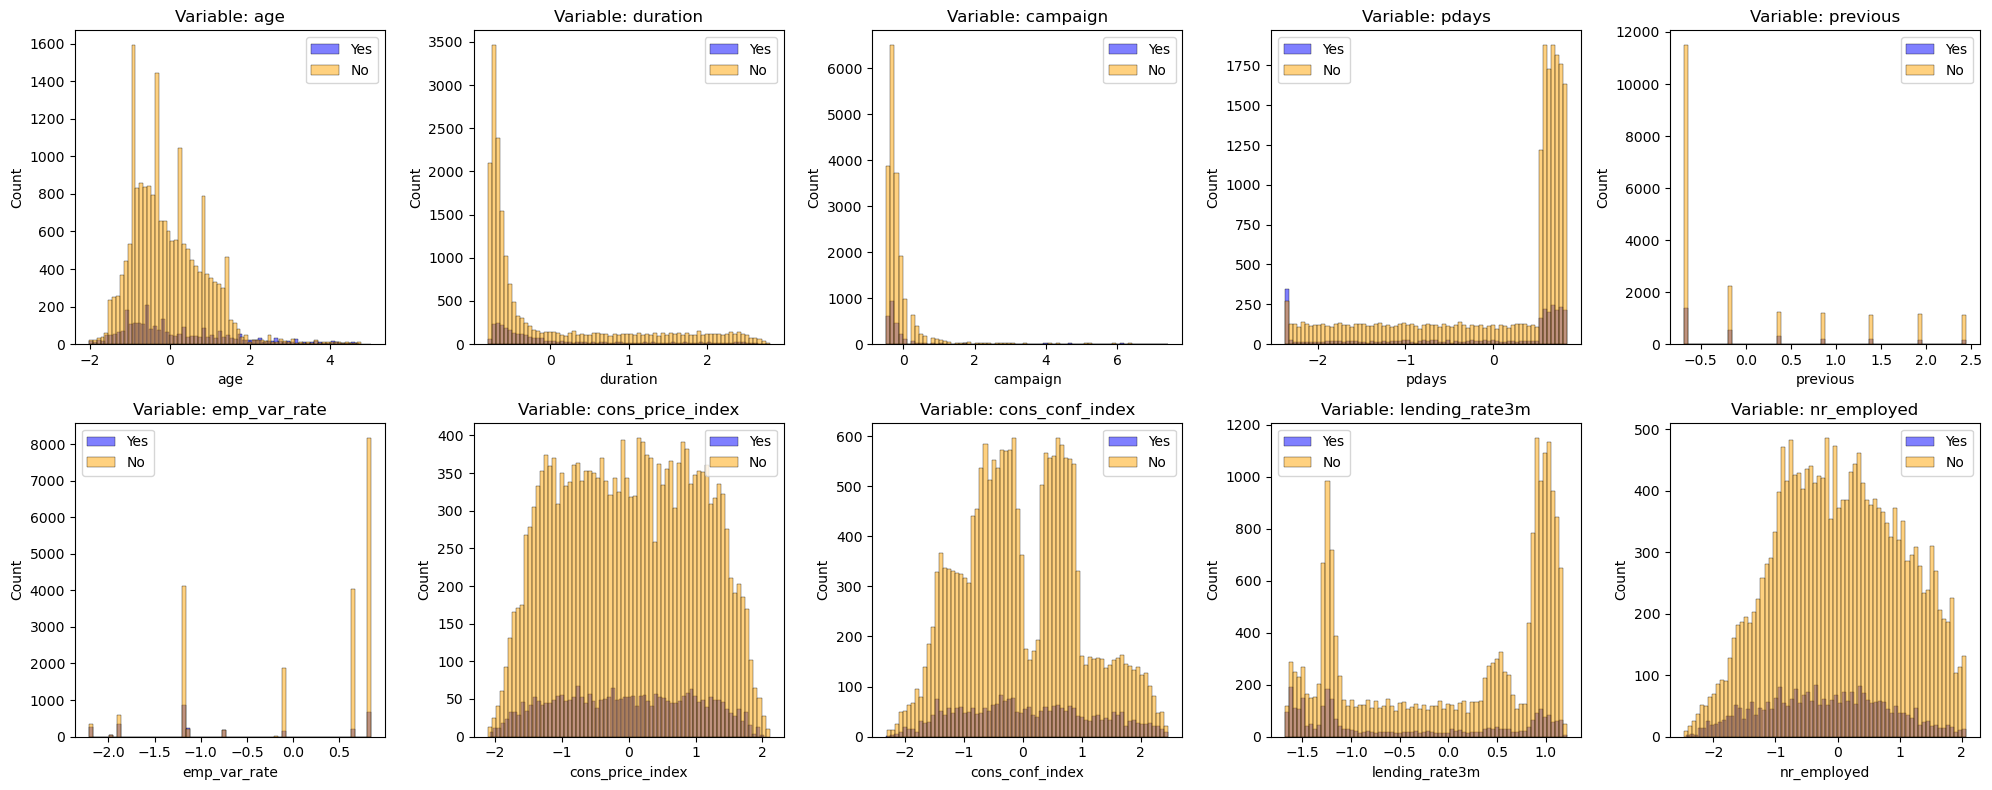

In [13]:
# 绘制频数直方图
# 数值型变量
train_num = train[columns_to_standardize]
#print(train_num.shape) (22500, 10)

# 设置画布大小
plt.figure(figsize=(20,8))

# 遍历每个变量并绘制直方图
for i, column in enumerate(train_num, 1):
    plt.subplot(2, 5, i)
    sns.histplot(yes[column], label='Yes', color='blue', alpha=0.5, bins=70)
    sns.histplot(no[column], label='No', color='orange', alpha=0.5, bins=70)
    plt.title(f'Variable: {column}')
    plt.legend()

plt.tight_layout()
plt.show()

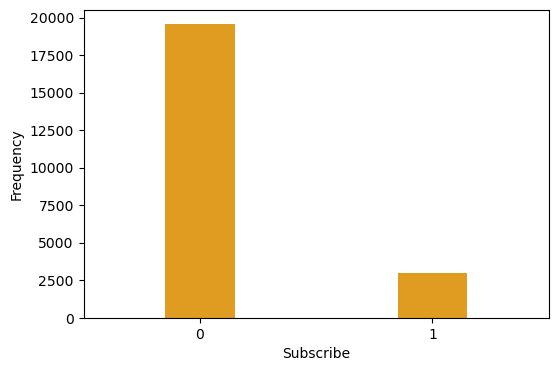

In [14]:
# 设置画布大小
plt.figure(figsize=(6, 4))

# 使用countplot绘制频数柱形图
sns.countplot(x='subscribe', data=pd.DataFrame(train['subscribe']), color='orange', width=0.3)

# 设置标题和标签
plt.xlabel('Subscribe')
plt.ylabel('Frequency')

# 保存图表
results_path = os.path.join(results_dir , "Subscribe柱状图.png")
plt.savefig(results_path)

plt.show()

In [15]:
y = pd.DataFrame(train_encoded['subscribe'])
X = train_encoded.drop('subscribe',axis = 1,inplace = False)

In [16]:
#pip install imbalanced-learn

In [17]:
# 合成少数类过采样技术SMOTE解决数据不平衡问题
from imblearn.over_sampling import SMOTE

smote = SMOTE(k_neighbors=5, sampling_strategy=0.3, random_state=42)
X, y = smote.fit_resample(X, y)

In [18]:
from collections import Counter

count = Counter(y['subscribe'])

# 输出样本数量
print("y=0的样本数量:", count[0])
print("y=1的样本数量:", count[1])

y=0的样本数量: 19548
y=1的样本数量: 5864


In [19]:
# PCA降维
from sklearn.decomposition import PCA

pca = PCA(n_components=X.shape[1])
pca.fit(X)

# 获取解释方差比例
explained_variance_ratio = pca.explained_variance_ratio_

# 计算累计解释方差比例
cumulative_explained_variance_ratio = np.cumsum(explained_variance_ratio)

# 打印累计解释方差比例:阀值为60%
print(cumulative_explained_variance_ratio)

[0.16152006 0.26885591 0.36126273 0.42305239 0.48228158 0.53721474
 0.58700205 0.61953214 0.65060428 0.67836081 0.70533931 0.72767125
 0.74879994 0.76728936 0.78358406 0.7992853  0.81355344 0.82671797
 0.83945163 0.85162369 0.86348171 0.87491323 0.88604258 0.89703349
 0.90585143 0.91433231 0.92252431 0.93031411 0.9369887  0.94269443
 0.94775532 0.95263145 0.95701727 0.96129552 0.96507183 0.96868094
 0.97205898 0.97487351 0.977512   0.97975067 0.98182521 0.98362521
 0.98533118 0.98690775 0.98834059 0.98974319 0.99103522 0.9923062
 0.9935299  0.99464029 0.99566807 0.99637757 0.99696003 0.99742684
 0.99783464 0.99823381 0.9985881  0.99890785 0.9992184  0.99947756
 0.99970311 0.99987455 1.        ]


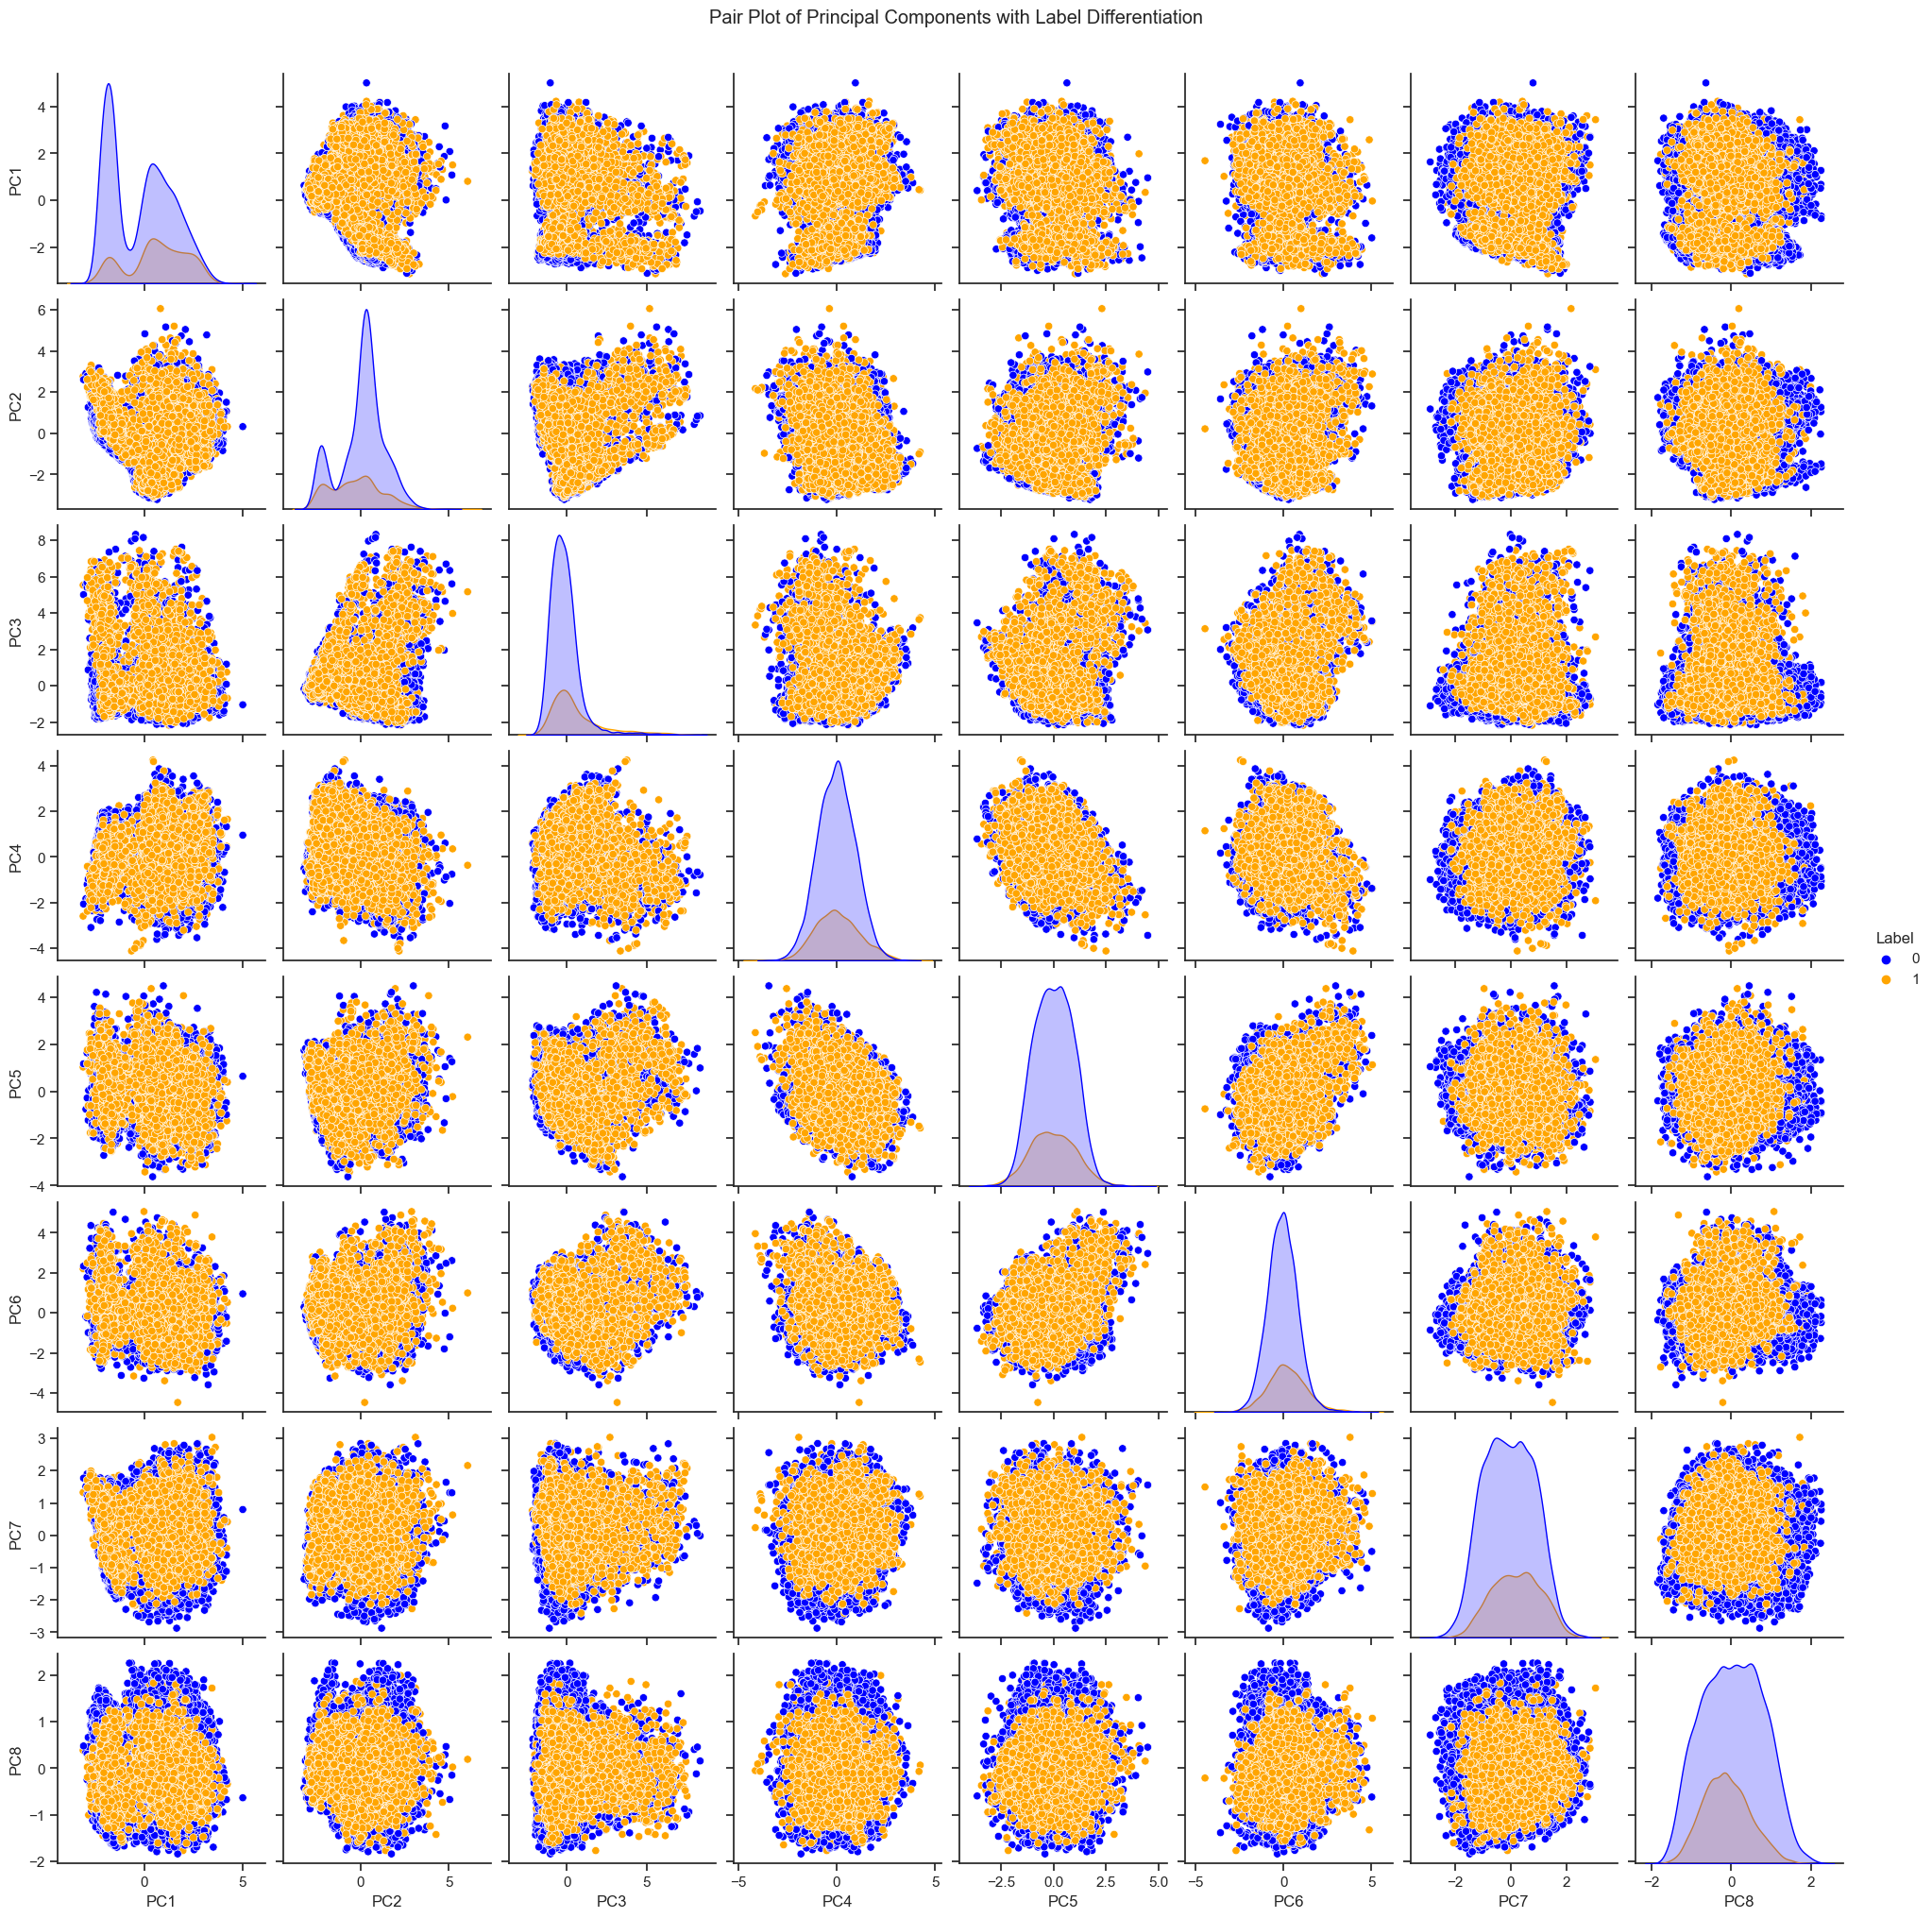

In [20]:
# 进行PCA
pca = PCA(n_components=8)
principal_components = pca.fit_transform(X)

# 将主成分和标签合并为DataFrame
df_pca = pd.DataFrame(data=principal_components, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'])
df_pca['Label'] = y

# 绘制 pair plot
sns.set(style="ticks")
sns.pairplot(df_pca, hue='Label', palette={0: 'blue', 1: 'orange'})
plt.suptitle("Pair Plot of Principal Components with Label Differentiation", y=1.02)

# 保存图表
results_path = os.path.join(results_dir , "Pair-Plot.png")
plt.savefig(results_path)

plt.show()

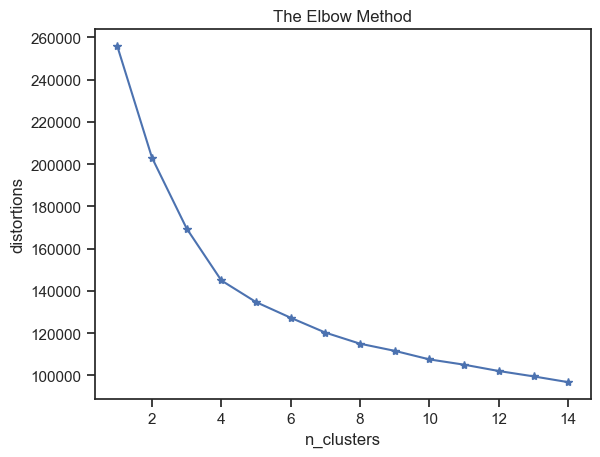

In [21]:
#进行聚类
#通过肘方法确定聚类数量
from sklearn.cluster import KMeans

sse=[]
x_km=df_pca.drop(columns='Label')
for i in range(1,15):
    km=KMeans(n_clusters=i,init='k-means++',n_init=10,max_iter=300,random_state=0)
    km.fit(x_km)
    sse.append(km.inertia_)
    
#绘制碎石图
plt.plot(range(1,15),sse,marker='*')
plt.xlabel('n_clusters')
plt.ylabel('distortions')
plt.title("The Elbow Method")
plt.show()
#最佳分类数量k为4

In [22]:
#进行KMeans聚类分析
kmeans=KMeans(n_clusters=4,init='k-means++',n_init=10,max_iter=300,random_state=0)
kmeans.fit(x_km)
lab=kmeans.predict(x_km)
print(lab)

[1 1 2 ... 3 3 3]


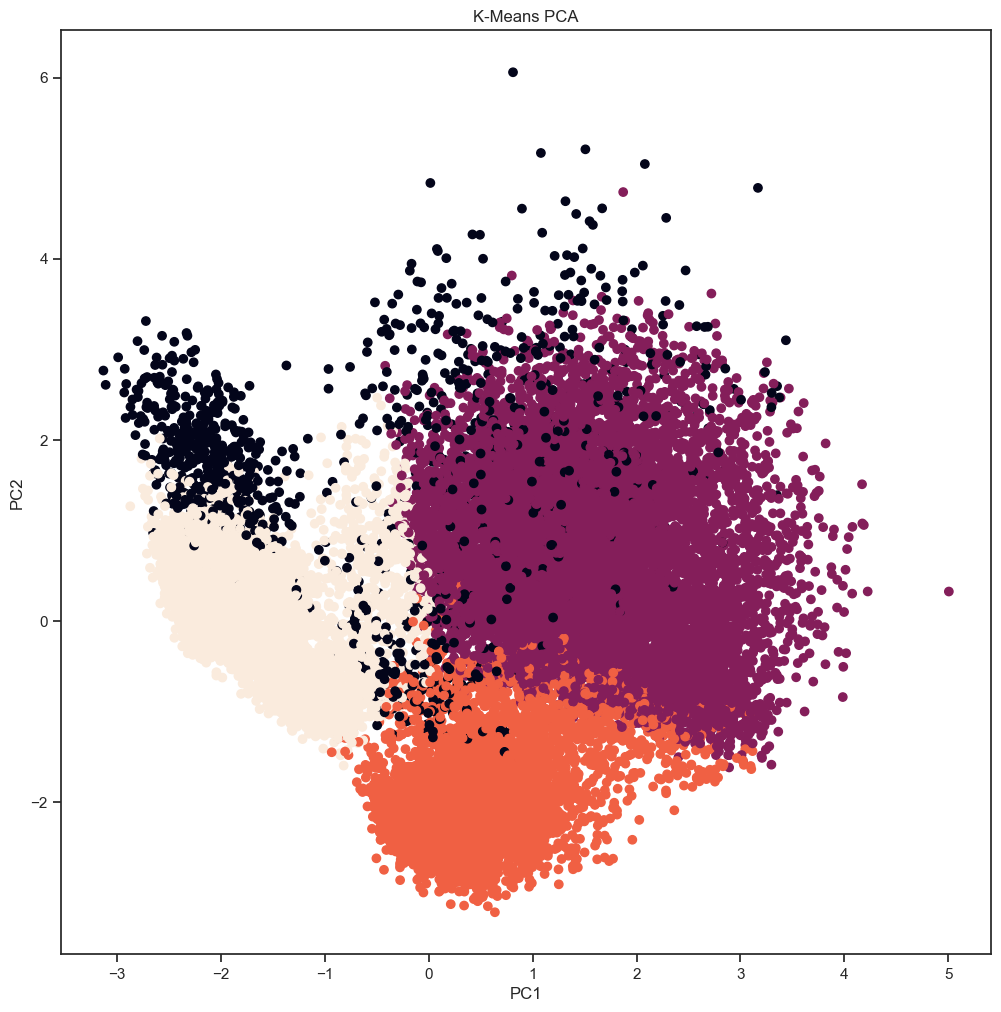

In [23]:
#绘制聚类结果的2维散点图
plt.figure(figsize=(12,12))
plt.scatter(x_km.iloc[:,0],x_km.iloc[:,1],c=lab)
for ii in np.arange(22500):
    plt.text(x_km.iloc[ii,0],x_km.iloc[ii,1],s='')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('K-Means PCA')
plt.show()

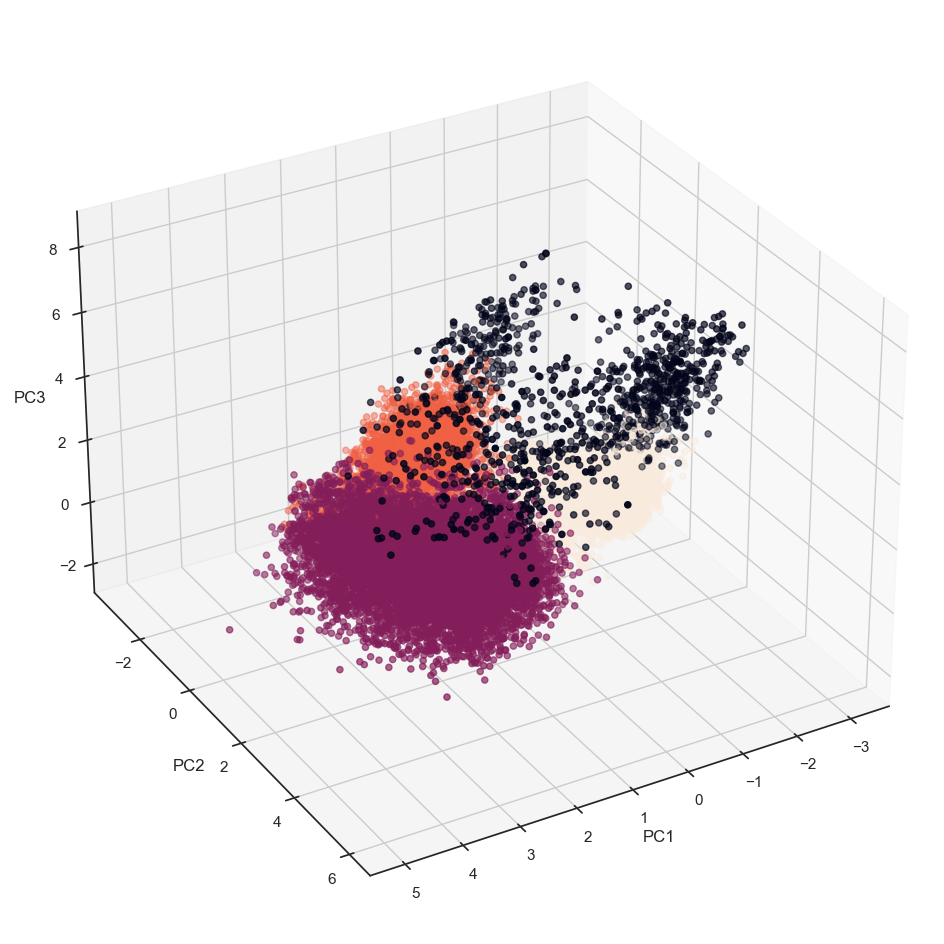

In [24]:
#绘制聚类结果的3d散点图
from mpl_toolkits.mplot3d import Axes3D
plt.figure(figsize=(12,12))
ax=plt.subplot(111,projection='3d')
ax.scatter(x_km.iloc[:,0],x_km.iloc[:,1],x_km.iloc[:,2],c=lab)
#视角转换
ax.view_init(30,60) 
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
plt.show()

In [25]:
#对测试集数据进行降维处理
#标准化
test[columns_to_standardize] = sc.fit_transform(test[columns_to_standardize])
#使用get_dummies进行独热编码
test_encoded = pd.get_dummies(test, columns=['job','marital', 'education', 'default', 'housing',
       'loan', 'contact', 'month', 'day_of_week','poutcome'])

# 进行PCA
pca = PCA(n_components=8)
principal_components2= pca.fit_transform(test_encoded)
test_pca = pd.DataFrame(data=principal_components2, columns=['PC1', 'PC2', 'PC3','PC4','PC5','PC6','PC7','PC8'])
print(test_pca)

              PC1       PC2       PC3       PC4       PC5       PC6       PC7  \
0     3749.500004  0.597282  1.461474 -0.825838  0.018450  0.758390  0.322829   
1     3748.499986  2.580551 -0.662013 -1.245719  0.089839 -0.659961  0.930471   
2     3747.500001 -1.219553  0.156035  0.270788  1.473421  0.187530  0.451387   
3     3746.500011  1.167978  0.320356 -0.525723  0.958918 -1.094375 -0.502740   
4     3745.500011  0.320197  1.169788 -0.347553 -1.040983  1.119711  0.033367   
...           ...       ...       ...       ...       ...       ...       ...   
7495 -3745.499932  1.698402  1.484202  4.768513 -1.478070 -0.857764  3.494500   
7496 -3746.500000  1.031839 -0.031447  0.077258  0.144726 -1.993044  0.195232   
7497 -3747.500016  0.046577 -2.095924  0.847165 -1.262825  1.482612 -0.497543   
7498 -3748.500018 -1.781921  0.590501 -0.669479 -0.629619  0.817684  0.529321   
7499 -3749.499989  1.156446  1.916578 -0.079908 -0.503439  1.532808 -0.111757   

           PC8  
0     0.74

In [26]:
#对测试集中的样本进行归类，并将结果导出至新建文件test_km中
test_km=pd.DataFrame()
test_km['客户类别']=kmeans.predict(test_pca)
print(test_km)

      客户类别
0        1
1        1
2        1
3        1
4        1
...    ...
7495     3
7496     3
7497     3
7498     3
7499     3

[7500 rows x 1 columns]


In [27]:
#用训练集每一类客户中认购产品的人数比例作为该类客户购买产品的概率
train_num=pd.DataFrame()
train_num['客户类别']=lab
train_num['认购情况']=y
print(train_num)

# 保存图表
results_path = os.path.join(results_dir , 'train_num.csv')
train_num.to_csv(results_path)

       客户类别  认购情况
0         1     0
1         1     1
2         2     0
3         0     1
4         1     0
...     ...   ...
25407     2     1
25408     1     1
25409     3     1
25410     3     1
25411     3     1

[25412 rows x 2 columns]


In [28]:
#用Excel计算了每类客户的认购比例
num_file = os.path.join(data_dir, 'num.xlsx')
num= pd.read_excel(num_file)
print(num)

   客户类别      认购比例
0     1  0.618538
1     2  0.347713
2     3  0.246801
3     4  0.105100


In [29]:
#进行Logistic回归
#拆分数据集
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x_km, y, test_size=0.2, random_state=0)
print('训练集大小：',x_train.shape,y_train.shape)
y_train=y_train.values
y_train=np.ravel(y_train)

#构建模型
from sklearn.linear_model import LogisticRegression
model_l=LogisticRegression()
model_l.fit(x_train,y_train)

训练集大小： (20329, 8) (20329, 1)


LogisticRegression()

In [30]:
#读入测试集进行回归，得到预测值
test_logistic=pd.DataFrame()
y_pred=model_l.predict(x_test)
test_logistic['y_pred']=model_l.predict(x_test)
print(test_logistic)

      y_pred
0          0
1          0
2          0
3          0
4          0
...      ...
5078       0
5079       1
5080       0
5081       0
5082       0

[5083 rows x 1 columns]


测试集准确率： 0.7910682667715916


<Axes: >

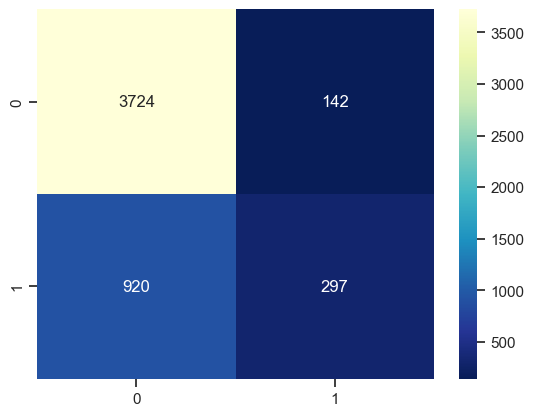

In [31]:
#计算测试集的准确率
print('测试集准确率：',model_l.score(x_test, y_test)) 
#输出可视化的混淆矩阵
from sklearn.metrics import confusion_matrix
cm1=confusion_matrix(y_test,y_pred)
import seaborn as sns
sns.heatmap(cm1,cmap="YlGnBu_r",fmt="d",annot=True)

AUC值为： 0.6036561286244491


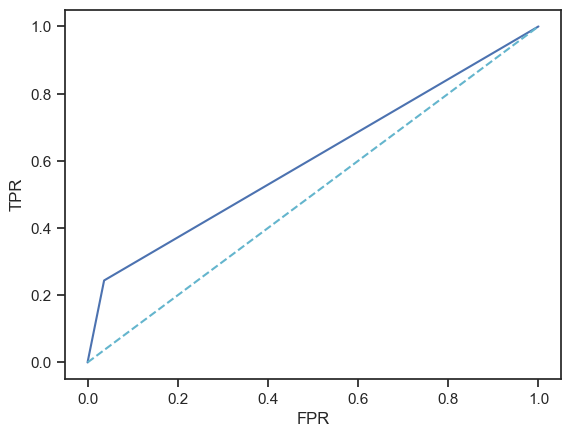

In [32]:
#绘制ROC曲线
from sklearn.metrics import roc_auc_score,roc_curve
auc_value1=roc_auc_score(y_test,y_pred)
print('AUC值为：',auc_value1)

FPR,TPR,thresholds=roc_curve(y_test,y_pred)
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
#绘制45度线
plt.plot(FPR, FPR,color="c",linestyle="dashed")
plt.show()


In [33]:
#K最近邻算法（KNN）
#构建模型
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=5)#将初始k值设为5
knn.fit(x_train,y_train)

#对测试集进行预测
test_knn=pd.DataFrame()
knn_pred=knn.predict(x_test)
test_knn['y_pred']=knn_pred
print(test_knn)

      y_pred
0          0
1          0
2          0
3          0
4          0
...      ...
5078       0
5079       0
5080       0
5081       0
5082       0

[5083 rows x 1 columns]


In [34]:
#计算测试集的准确率
print('测试集准确率：',knn.score(x_test, y_test)) 
#输出可视化的混淆矩阵
cm2=confusion_matrix(y_test,knn_pred)
sns.heatmap(cm2,cmap="YlGnBu_r",fmt="d",annot=True)

测试集准确率： 0.823135943340547


<Axes: >

AUC值为： 0.7460697541850853


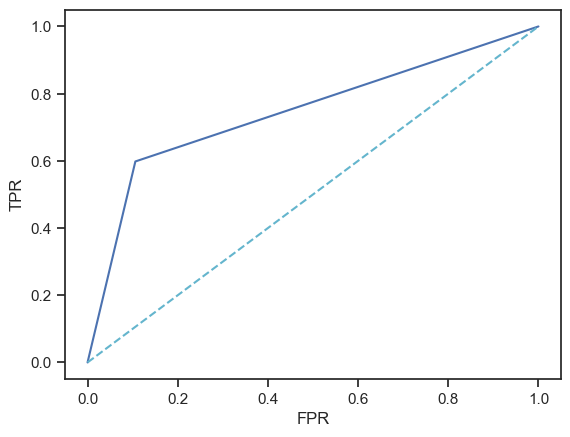

In [35]:
#绘制ROC曲线
auc_value1=roc_auc_score(y_test,knn_pred)
print('AUC值为：',auc_value1)

FPR,TPR,thresholds=roc_curve(y_test,knn_pred)
plt.plot(FPR,TPR)
plt.xlabel("FPR")
plt.ylabel("TPR")
#绘制45度线
plt.plot(FPR, FPR,color="c",linestyle="dashed")
plt.show()

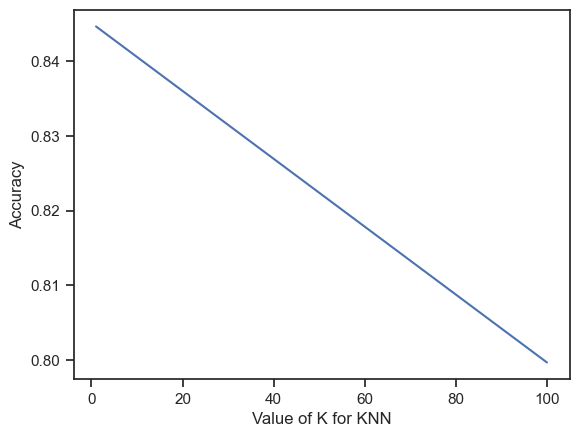

In [36]:
#选择效果最好的k值
k_accuracy=[]
k_range=(1,100)
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(x_train,y_train)
    scores = knn.score(x_test, y_test)
    k_accuracy.append(scores.mean())
#画图
plt.plot(k_range, k_accuracy)
plt.xlabel('Value of K for KNN')
plt.ylabel('Accuracy')
plt.show()
#说明随着k增大，通过KNN得到预测结果其准确率递减

In [37]:
####################################### 决策树 #################################################
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import roc_curve
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
from sklearn import tree

In [38]:
#模型训练
dtModel = DecisionTreeClassifier(max_leaf_nodes=5,random_state=88)
dtModel.fit(x_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=5, random_state=88)

测试集准确率： 0.7906747983474326


<Axes: >

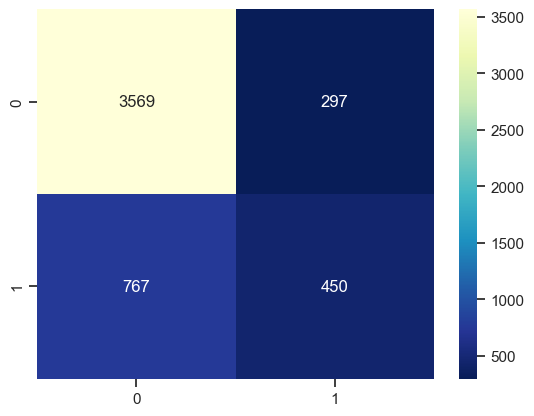

In [39]:
#计算测试集的准确率
print('测试集准确率：',dtModel.score(x_test, y_test)) 
#输出可视化的混淆矩阵
y_predict=dtModel.predict(x_test)
from sklearn.metrics import confusion_matrix
cm4=confusion_matrix(y_test,y_predict)
sns.heatmap(cm4,cmap="YlGnBu_r",fmt="d",annot=True)

AUC值为： 0.6464690594233018


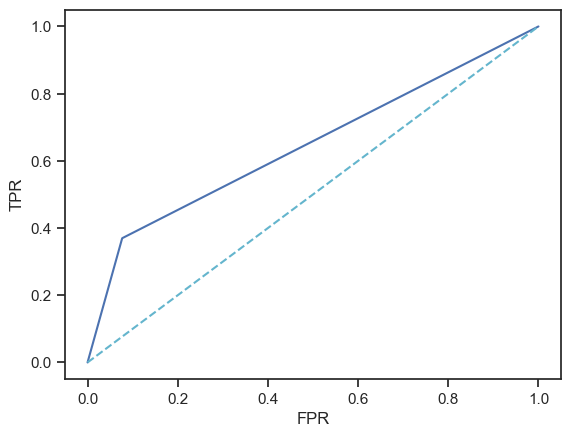

In [40]:
#绘制ROC曲线
from sklearn.metrics import roc_auc_score,roc_curve
auc_value4=roc_auc_score(y_test,y_predict)
print('AUC值为：',auc_value4)

#绘制ROC曲线
fpr, tpr, thres = roc_curve(y_test, y_predict)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.plot(fpr, tpr)
#绘制45度线
plt.plot(fpr, fpr,color="c",linestyle="dashed")
plt.show()


In [41]:
# 获取特征名称
features = x_train.columns
# 获取特征重要性
importances = dtModel.feature_importances_
# 通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
print(importances_df.sort_values('特征重要性', ascending=False))

  特征名称     特征重要性
2  PC3  0.484412
0  PC1  0.258604
1  PC2  0.256984
3  PC4  0.000000
4  PC5  0.000000
5  PC6  0.000000
6  PC7  0.000000
7  PC8  0.000000


In [42]:
#决策树可视化
#以文字形式输出决策树
text_representation = tree.export_text(dtModel)
print(text_representation)

|--- feature_2 <= 1.09
|   |--- feature_1 <= -0.38
|   |   |--- feature_0 <= 0.31
|   |   |   |--- class: 0
|   |   |--- feature_0 >  0.31
|   |   |   |--- feature_0 <= 1.95
|   |   |   |   |--- class: 0
|   |   |   |--- feature_0 >  1.95
|   |   |   |   |--- class: 1
|   |--- feature_1 >  -0.38
|   |   |--- class: 0
|--- feature_2 >  1.09
|   |--- class: 1



In [43]:
####################################### 随机森林 #################################################
# 引入函数库
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score

In [44]:
#模型训练
model=RandomForestClassifier(n_estimators=500,random_state=2024)
model.fit(x_train,y_train)

RandomForestClassifier(n_estimators=500, random_state=2024)

In [45]:
#特征变量重要性排名
#获取特征名称
features = x_train.columns
#获取特征重要性
importances = model.feature_importances_
#通过二维表格形式显示
importances_df = pd.DataFrame()
importances_df['特征名称'] = features
importances_df['特征重要性'] = importances
print(importances_df.sort_values('特征重要性', ascending=False))

  特征名称     特征重要性
2  PC3  0.154086
1  PC2  0.150543
0  PC1  0.150449
5  PC6  0.115039
7  PC8  0.112444
6  PC7  0.108716
3  PC4  0.106672
4  PC5  0.102050


In [46]:
#计算测试集的准确率
print('测试集准确率：',model.score(x_test, y_test)) 
#输出可视化的混淆矩阵
y_predict=model.predict(x_test)
from sklearn.metrics import confusion_matrix
cm3=confusion_matrix(y_test,y_predict)
sns.heatmap(cm3,cmap="YlGnBu_r",fmt="d",annot=True)

测试集准确率： 0.8443832382451308


<Axes: >

AUC值为： 0.7301972274992019


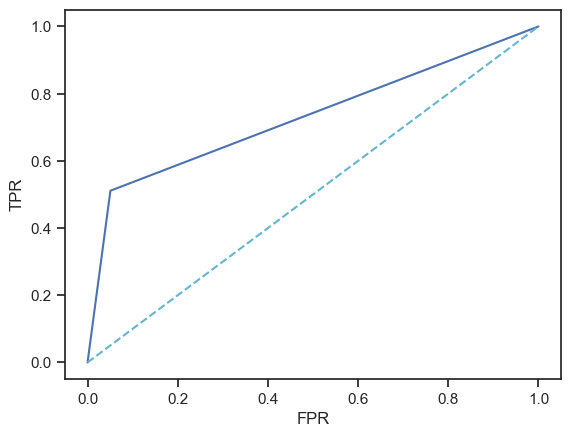

In [47]:
#绘制ROC曲线
from sklearn.metrics import roc_auc_score,roc_curve
auc_value3=roc_auc_score(y_test,y_predict)
print('AUC值为：',auc_value3)

#绘制ROC曲线
fpr, tpr, thres = roc_curve(y_test, y_predict)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.plot(fpr, tpr)
#绘制45度线
plt.plot(fpr, fpr,color="c",linestyle="dashed")
plt.show()


In [48]:
####################################### 支持向量机 #################################################
import sklearn
from sklearn import datasets
from sklearn import svm
 
# 数据集训练
clf_rbf = svm.SVC(decision_function_shape="ovo", kernel="rbf")
clf_rbf.fit(x_train, y_train)
 
y_test_pre_rbf = clf_rbf.predict(x_test)
 

测试集准确率： 0.8024788510722014


<Axes: >

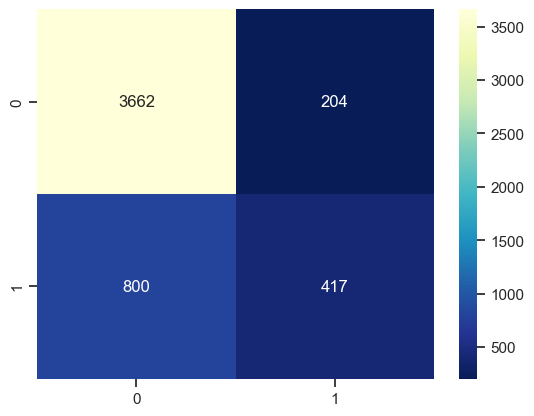

In [49]:
#计算测试集的准确率
print('测试集准确率：',clf_rbf.score(x_test, y_test))
#输出可视化的混淆矩阵
from sklearn.metrics import confusion_matrix
cm5=confusion_matrix(y_test,y_test_pre_rbf)
sns.heatmap(cm5,cmap="YlGnBu_r",fmt="d",annot=True)

AUC值为： 0.6449390659398816


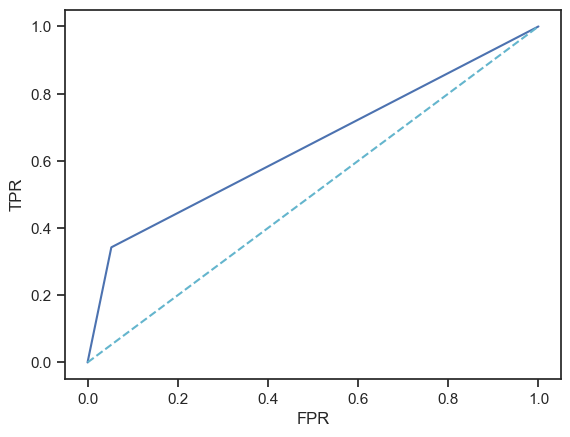

In [50]:
#绘制ROC曲线
from sklearn.metrics import roc_auc_score,roc_curve
auc_value5=roc_auc_score(y_test,y_test_pre_rbf)
print('AUC值为：',auc_value5)

#绘制ROC曲线
fpr, tpr, thres = roc_curve(y_test, y_test_pre_rbf)
plt.xlabel("FPR")
plt.ylabel('TPR')
plt.plot(fpr, tpr)
#绘制45度线
plt.plot(fpr, fpr,color="c",linestyle="dashed")
plt.show()
